# CS 677 S02 2021 Final Project
Phillip Escandon Escandon@bu.edu  
Professor Pinsky    
Facilitator: Mohammand Alaghemandi  
**Final Project**  
April, 2021


# Meteor Classification
This project is a cumulation of a learning path that began last winter - when I listened to a [podcast](https://talkpython.fm/episodes/show/280/python-and-ai-in-journalism) about AI Bots used for Journalism.  

This led to [John Keefe](https://johnkeefe.net/ai-classes-for-journalists) and his cool projects.  He's a journalist that knows machine learning.  He was using a framework called **fastai**.  So I decided to pull on that thread a little and found **[Jeremy Howard](https://www.fast.ai/)** and his Data Science Institute at the University of San Franscisco. 


He has a unique approach to teaching and learning, which is very top-down, which is opposite our traditional learning experience. He uses [Jupyter Notebooks](https://www.fast.ai/2019/12/02/nbdev/) almost exclusively for coding, testing and integration into Github - things that have been missing for a long long time.

## Problem: Hunting for Meteors - Night Photography as a hobby
I have an entry level prosumer digital camera - and I can program the camera to take images for hours on end.  The problem is filtering through the images - sometimes almost a thousand - to find a photo containing the meteor.

**What I need is a program that can detect /CLASSIFY an image.  It should tell me if it containing a meteor or is simply the night sky**





## Summary
I will use an existing image model and retrain it to detect meteors. I am using a few tools for the first time -mainly fast.ai and Pytorch.  I did try Google Colab during one of our assignments - seemed pretty good with lots of features.

* **Google Colab** Pro for access to a GPU for model training purposes. 
    *   Enable GPU Runtype when running this notebook!!
* **Github** used to store code and host website
* **fast.ai** and **Pytorch** are the python libraries used.

> The main lesson learned from this project - 
is that data is paramount and where most of my time was spent - finding, 

1.   Data is paramount.  Most of my time was spent attempting to find, curate, label and use my own data and augement it with data found online.  Very difficult to do that and come up with a good model that's better an flipping a coin.
2.   Tools surrounding data analysis seem to be more of a problem.  For instance - I used the Bing Search API which required me to sign up for an API key.  Days were spent trying to get everything to work.  And that was to simply augment my existing data set.

3.  Making a model is only one step in a long process.
  * How do you deploy your model?
  * How do you update your model once deployed?
  * How do you incorporate new data into your training set?

  



## Sections and Goals
I will use the same methodolgy used in our class, with a few side line explorations since I am using my own data.


1.   Find and label my data
2.   Split my data
3.   Train - use transfer learning to retrain an existing Resnet model
4.   Host my model on github.




### I have only a few good images of meteors so I will collect some image data from the web to bolster my existing image data.  I will mount my google drive to store my image data.







In [3]:
#hide
!pip install -Uqq fastbook --upgrade
import fastbook
fastbook.setup_book()

Now import libraries with * - these libraries are written to support import * without polluting your namespace.

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# Meteor Image Collection
Because I don't have many meteor images I will begin by collecting some from Bing Image Search to bolster my collection of meteor images. 

First I must get a Azure Search API Key. Very painful process.


* Register for Azure Search API Key
* Mount Google drive to save photos



In [ ]:
# only do this a few times to get some image data
# My personal Azure Search API Key
# key = os.environ.get('AZURE_SEARCH_KEY', '1bb5a353xxxxxxxxxxx001fbxxx74')

In [ ]:
#hide
#drive.mount("/content/drive", force_remount=True)

# Get additional data
using the download_images() from the fastai library.  
The night_types are what is passed into the Bing Image Search.  If you don't have good search terms, you can get a bunch of meaningless imagery back and spend lots of time cleaning your data.

In [35]:

night_types = 'night','meteor' # 'clear starry night sky nasa works best
# path = Path('/content/drive/MyDrive/cs677FinalProject')
path = Path('/content/drive/MyDrive/meteorProject')
#path = Path('/content/drive/MyDrive/night')

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in night_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o}')
#         download_images(dest, urls=results.attrgot('contentUrl'))

### Check the path to see if we actually have the files as expected.
Only did this once the image files were downloaded.  I didn't want to go through the process of cleaning files everytime images were downloaded.

In [15]:
fns = get_image_files(path)
fns

(#203) [Path('/content/drive/MyDrive/meteorProject/night/00000004.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000003.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000009.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000008.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000001 (1).jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000020.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000007 (1).jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000053.jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000017 (1).jpg'),Path('/content/drive/MyDrive/meteorProject/night/00000052.jpg')...]

Check for bad files that did not download correctly. Only done when images downloaded from the internet.  
Remove any failed images.

In [8]:
# failed = verify_images(fns)
# failed
# failed.map(Path.unlink);

## Splitting my data into training and test sets

> Dataloader is a fastai class that stores multiple `DataLoader` objects you pass to it, normally a `train` and a `valid`, in class we called this `train` and `test`.  I split my data 50/50 for the training and test sets.  I also increased the pixel size of the images from 128 to 224 in my attempt to get a better model.

In [16]:
# block  - tuple to describe the independent and dependant variable.  Images & Category in this case.
# get_items - fastai f(x) to return image files
# splitter - training and testing split
# get_y  - parent_label is the label of the folder that contains the images
# items_tfms = item transform to all be 224x224 pixels

sky = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=12),
    get_y=parent_label,
    item_tfms=Resize(224))

In [17]:
dls = sky.dataloaders(path)

The Dataloaders function provides *two* dataloader classes.  One is a **Training** class - the other is a **Validation** class, similar to our Train / Testing split that we learned in class.

This special class is what provides a few batches of images to the GPU.  These batches of images are stacked up, like a deck of cards, and this stack of images is called a **Tensor** hence - *TensorFlow* from Google!


Lets look at a batch of images, make sure things are working.

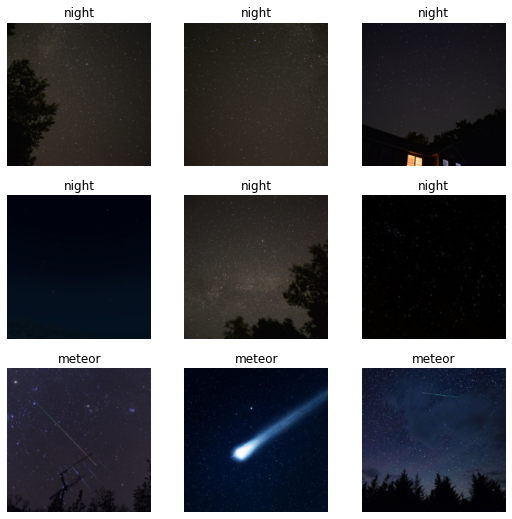

In [18]:
dls.valid.show_batch(max_n=9, nrows=3)

### Data Augmentation
There are a few transforms that can be applied like stretching, flipping the images.  I choose a standard set of augementations but should look more closely at this section in order to improve my model.

# Captured data - Now what? 
Now that I have assembled my data in a format fit for model training, I will train an image classifier using the data.

## Retraining my RESNET Model, and Using a cleaner to Clean my images

I used the fastai library and the several fastai functions but they are analogous to our routine in our classwork.

*   Get Data
*   Split Data
*   Train Model
*   Predict
*   Evaluate


The **cnn_learner()** function is taking in an image classification model called **resnet18**.  This `transfer learning` is using an existing model and retuning the final parameters to our specific category of use. 

An analogy was that you have a built pyramid and you just chop off the top and train that top and reassemble!

Very interesting way of using an existing model for your own use! 

In [19]:
sky = sky.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.75),
    batch_tfms=aug_transforms())
dls = sky.dataloaders(path)

# Create a model
We can now create our `Learner` and fine-tune with 4 **epochs**, which is 4 complete passes through the data.  For each pass, we will get an error rate associated with the pass

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

About two minutes later we have a trained model.  We don't know if it's any good yet - but we can check the confusion matrix.

Not bad - I suspect that the problems are the 'extra' scenery in the images that are throwing off the model. Retrying this model approach with my API key yeilded all kind of results - the best being 80% success.   

# Evaluate
Confusion Matrix to see where we are at and where the model had problems.

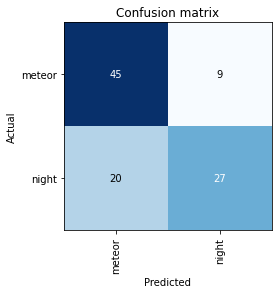

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

One of the really neat things is the straight forward nature of this fastai frame work is checking the images, see where you went wrong and fixing and training the model again to get results quickly.

These are my top mistakes - 

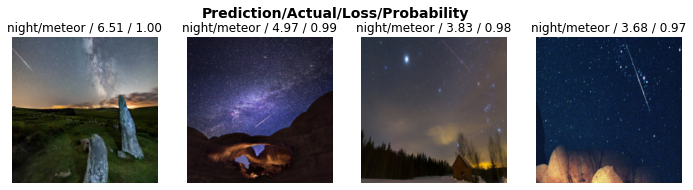

In [ ]:
interp.plot_top_losses(4, nrows=1)

The first image is predicted as 'night' with a 100% confidence. The model is not guessing the 'night' shots very accurately.

# Clean the data
Another neat feature is the ability to clean your images, delete the bad ones that you collected from the web, or classify them correctly and train again.  
I can go through the training and test set and clean.   I found it easier just to go to my google drive and look at the obvious cartoon images to delete them straight away.

In [22]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
#hide
# This will delete any images that were tagged for deletion
# or move to the appropriate folder as tagged.
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Get Data Second Time
Now go through the process one more time.
You should get another dataloader (training / testing split) because we removed and modified some of the files during our cleaning.

In [24]:
# Get the file names again
# Since we modified the files above
fns = get_image_files(path)
fns

sky = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=12),
    get_y=parent_label,
    item_tfms=Resize(224))

sky = sky.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.75),
    batch_tfms=aug_transforms())
dls = sky.dataloaders(path)



# Create Model Second Time

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

### Now our Error rate is a little better.
Lets look at our confusion matrix:

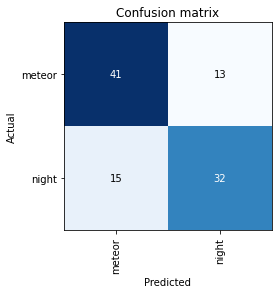

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


## See our top losses

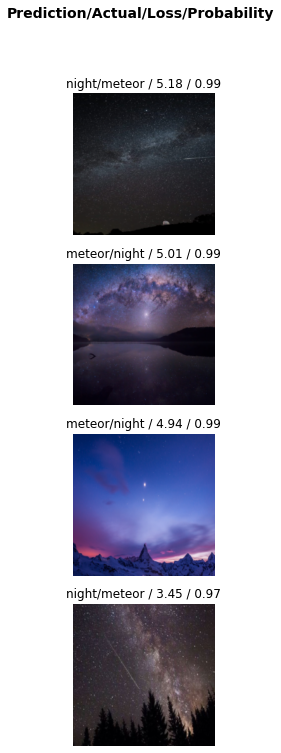

In [27]:
interp.plot_top_losses(4, nrows=4)

I'm concerned with our top losses, the model appears to have a high confidence of a 'night' image (99%) but there is a meteor in this image. 
It's still not very good.
At some point in my cleaning- I did have an error rate of 20%- which was my best result.

# Clean again


In [28]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

Remove according to how I tagged the images above

In [29]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Get Data from folders
Get our new dataloaders

In [30]:
# Get the file names again
# Since we deleted and/or modified the files above
fns = get_image_files(path)
fns

sky = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.5, seed=12),
    get_y=parent_label,
    item_tfms=Resize(224))

sky = sky.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.75),
    batch_tfms=aug_transforms())
dls = sky.dataloaders(path)



### Create our learner and fine tune
A few issues:

1.   The image dataset probably contains to many 'photographs' of meteor, including interesting foregrounds such as trees, mountains, lakes, so this is probably underminig the models ability.
2.   RandomResizeCrop() - this function is randomly selecting a part of the image - then cropping around that randomly selected center.  That means the image might not contain the 'meteor' or 'night' sky.   

These are definately 'data' problems that should be looked at more closely if I want a more accurate model.



In [31]:

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Confusion Matrix

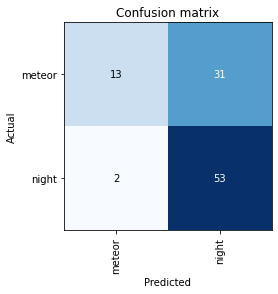

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Now that we have trained our model, let's see how we can deploy it to be used in practice.

## Turning Your Model into an Online Application

We are now going to look at what it takes to turn this model into a working online application. We will just go as far as creating a basic working prototype; we do not have the scope in this book to teach you all the details of web application development generally.

### Using the Model for Inference

## Save the model as a python pickle file!
Now the idea is to use the model as you would any function!

When you call `export`, fastai will save a file called "export.pkl":

In [38]:
learn.export()

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

In [40]:
# path = Path('/content/drive/MyDrive/meteorProject')  # Doesn't work
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

I renamed this file meteorProject64.pkl in my google drive.

In [46]:
# learn_inf = load_learner('/content/drive/MyDrive/meteorProject/meteorProject64.pkl')
learn_inf = load_learner('/content/drive/MyDrive/night/meteorProjectModel.pkl')

To test this, I'll pass a file to `predict` that I know has a meteor in it.

In [47]:
learn_inf.predict('/content/drive/MyDrive/nightSky/p_meteor.jpg')

('meteor', tensor(0), tensor([0.9877, 0.0123]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

In [48]:
learn_inf.dls.vocab

['meteor', 'night']

We know how to make predictions from our saved model, so we have everything we need to start building our app. We can do it directly in a Jupyter notebook.

### Creating a Notebook App from the Model


Create a complete working web application using nothing but Jupyter notebooks! The two things we need to make this happen are:

- IPython widgets (ipywidgets)
- Voilà

But we still have the advantage of developing in a notebook, so with ipywidgets, we can build up our GUI step by step. We will use this approach to create a simple image classifier. First, we need a file upload widget:

In [55]:
#hide_output
btn_upload = widgets.FileUpload()
# btn_upload

In [58]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/drive/MyDrive/nightSky/p_meteor.jpg'])

In [59]:
img = PILImage.create(btn_upload.data[-1])

We can use an `Output` widget to display it:

In [60]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [61]:
pred,pred_idx,probs = learn_inf.predict(img)

and use a `Label` to display them:

In [62]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: meteor; Probability: 0.9877')


We'll need a button to do the classification. It looks exactly like the upload button:

In [63]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [53]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
btn_run = widgets.Button(description='Classify')

In [64]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (`VBox`) to complete our GUI:

In [65]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [66]:
#hide_output
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

We have written all the code necessary for our app. The next step is to convert it into something we can deploy.

### Turning Your Notebook into a Real App

    !pip install voila
    !jupyter serverextension enable --sys-prefix voila



We have our app, now let's deploy it!

In [67]:
    !pip install voila
    !jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.6MB 12.1MB/s 
     |████████████████████████████████| 552kB 54.0MB/s 
     |████████████████████████████████| 378kB 47.2MB/s 
     |████████████████████████████████| 122kB 57.3MB/s 
     |████████████████████████████████| 430kB 45.1MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [ ]:
#hide
drive.mount("/content/drive", force_remount=True)

### Deploying your app

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. The best place and the best way to do this will vary over time, so check the [book's website](https://book.fast.ai/) for the most up-to-date recommendations. As we're writing this book in early 2020 the simplest (and free!) approach is to use [Binder](https://mybinder.org/). To publish your web app on Binder, you follow these steps:

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/name.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe. 
6. Click Launch.

<img alt="Deploying to Binder" width="800" caption="Deploying to Binder" id="deploy-binder" src="https://github.com/philescandon/fastbook/blob/master/images/att_00001.png?raw=1">

The first time you do this, Binder will take around 5 minutes to build your site. Behind the scenes, it is finding a virtual machine that can run your app, allocating storage, collecting the files needed for Jupyter, for your notebook, and for presenting your notebook as a web application.

Finally, once it has started the app running, it will navigate your browser to your new web app. You can share the URL you copied to allow others to access your app as well.

For other (both free and paid) options for deploying your web app, be sure to take a look at the [book's website](https://book.fast.ai/).